In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [14]:
# read csv file 104_113.csv in 02_intermediate folder as dataframe and convert to pq format
df_csv = pd.read_csv('../data/02_intermediate/104_113.csv')
df_csv.to_parquet('../data/02_intermediate/104_113.pq')

In [7]:
# examine the dataframe when it is in csv format
df_csv.tail()

,timestamp,SHT40_temp,SHT40_Humidity,A1_Sensor,A1_Resistance
13223679,1682321617130,26.06,44.66,274.0,14206203.0
13223680,1682321617180,26.03,44.67,273.0,14258791.0
13223681,1682321617230,26.05,44.71,273.0,14258791.0
13223682,1682321617279,26.05,44.68,273.0,14258791.0
13223683,1682321617330,26.05,44.67,273.0,14258791.0


In [15]:
# create dataframe from pq file
df_pq = pd.read_parquet('../data/02_intermediate/104_113.pq')

In [16]:
df_pq.tail()

,timestamp,SHT40_temp,SHT40_Humidity,A1_Sensor,A1_Resistance
13223679,1682321617130,26.06,44.66,274.0,14206203.0
13223680,1682321617180,26.03,44.67,273.0,14258791.0
13223681,1682321617230,26.05,44.71,273.0,14258791.0
13223682,1682321617279,26.05,44.68,273.0,14258791.0
13223683,1682321617330,26.05,44.67,273.0,14258791.0


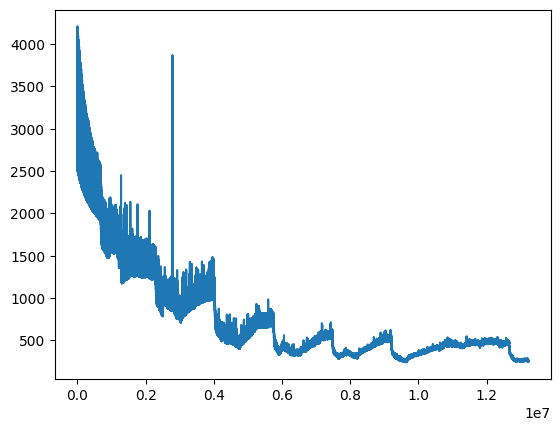

In [17]:
# plot the first 5000 data point of A1_Sensor from df_pq
plt.plot(df_pq['A1_Sensor'])
plt.show()

---
103 Data exploration and trimming

In [41]:
# 103 df to pq from 01raw
df_103_csv = pd.read_csv('../data/01_raw/103_SHT_SMD.txt',delimiter='\t')
df_103_csv.to_parquet('../data/01_raw/103.pq')

In [42]:
# examine 103pq df delimited by tab
df_103_pq = pd.read_parquet('../data/01_raw/103.pq')
df_103_pq.head()

,timestamp,SHT40_temp,SHT40_Humidity,A0_3V_OFF,A1_Sensor,A1_Resistance
0,1.681630e+12,29.24,43.71,8484,2963,1177573.50
1,1.681630e+12,29.23,43.74,8484,2962,1178021.62
2,1.681630e+12,29.22,43.72,8484,2962,1178021.62
3,1.681630e+12,29.24,43.67,8483,2961,1178470.00
4,1.681630e+12,29.22,43.70,8483,2962,1178021.62


In [44]:
# find the maximum value index of A1_Sensor in 103.pq and delete data before maximum value index
max_idx = df_103_pq['A1_Sensor'].idxmax()
print(max_idx)
len(df_103_pq)

3215


545347

In [45]:
trim_df = df_103_pq[max_idx:]
len(trim_df)

# write a function verify that df_103_pq - trim_df = max_idx if true return ok
len(df_103_pq) - len(trim_df) == max_idx

def len_verify(df1,df2):
    if len(df1) - len(df2) == max_idx:
        return True
    else:
        return False

len_verify(df_103_pq,trim_df)
trim_df.head()

,timestamp,SHT40_temp,SHT40_Humidity,A0_3V_OFF,A1_Sensor,A1_Resistance
3215,1.681630e+12,30.35,43.85,8487,26248,-137.15
3216,1.681630e+12,30.34,43.86,8487,26176,275.06
3217,1.681630e+12,30.35,43.90,8486,26101,706.86
3218,1.681630e+12,30.36,43.92,8486,26036,1083.11
3219,1.681630e+12,30.36,43.98,8486,25973,1449.58


In [ ]:
# plot trim_df with plotly
fig = px.line(trim_df, y='A1_Sensor')
fig.show()

In [38]:
# drop repeated timestamp value in trim_df
trim_copy = trim_df.copy()
trim_copy.drop_duplicates(subset='timestamp',keep='first',inplace=True)
dup_idx = pd.Series(trim_copy.index)
dup_idx


0      3215
1    153821
2    353821
dtype: int64